In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp
import einops as ein
import jax
import jax.numpy as jnp
import numpy as np

theme, cs = rp.mpl_setup(True)

In [2]:
from pyxtal import Group
from pymatgen.core import SymmOp

plane_groups = []

for sg in range(1, 231):
    gp = Group(sg).Wyckoff_positions[0]
    if all(np.allclose(op.affine_matrix[2], [0, 0, 1, 0]) for op in gp.ops):
        plane_groups.append(Group(sg))

[g.symbol for g in plane_groups]

['P1',
 'Pm',
 'Cm',
 'Pmm2',
 'Pma2',
 'Pba2',
 'Cmm2',
 'P4',
 'P4mm',
 'P4bm',
 'P3',
 'P3m1',
 'P31m',
 'P6',
 'P6mm']

In [3]:
from collections import defaultdict

all_wps = defaultdict(list)
total = 0

for sg in map(Group, range(1, 231)):
    for op in sg.Wyckoff_positions[0].ops:
        total += 1
        all_wps[op.as_xyz_string()].append(sg.symbol)

len(all_wps), total

(989, 4425)

In [4]:
from collections import defaultdict

wps = defaultdict(list)

for pg in plane_groups:
    for op in pg.Wyckoff_positions[0].ops:
        wps[op.as_xyz_string()].append(pg.symbol)

wps

defaultdict(list,
            {'x, y, z': ['P1',
              'Pm',
              'Cm',
              'Pmm2',
              'Pma2',
              'Pba2',
              'Cmm2',
              'P4',
              'P4mm',
              'P4bm',
              'P3',
              'P3m1',
              'P31m',
              'P6',
              'P6mm'],
             'x, -y, z': ['Pm', 'Cm', 'Pmm2', 'Cmm2', 'P4mm'],
             'x+1/2, y+1/2, z': ['Cm', 'Cmm2'],
             'x+1/2, -y+1/2, z': ['Cm', 'Pba2', 'Cmm2', 'P4bm'],
             '-x, -y, z': ['Pmm2',
              'Pma2',
              'Pba2',
              'Cmm2',
              'P4',
              'P4mm',
              'P4bm',
              'P6',
              'P6mm'],
             '-x, y, z': ['Pmm2', 'Cmm2', 'P4mm'],
             'x+1/2, -y, z': ['Pma2'],
             '-x+1/2, y, z': ['Pma2'],
             '-x+1/2, y+1/2, z': ['Pba2', 'Cmm2', 'P4bm'],
             '-x+1/2, -y+1/2, z': ['Cmm2'],
             '-y, x, z': ['P4', 'P4m

In [5]:
wp_names = sorted(wps.keys(), key=lambda x: -len(wps[x]))
wp_m = [SymmOp.from_xyz_string(name).affine_matrix[:2, [0, 1, 3]] for name in wp_names]
wp_m = jnp.array(wp_m)

wp_w = np.zeros((len(plane_groups), len(wp_names)))

groups = [pg.symbol for pg in plane_groups]

for i, name in enumerate(wp_names):
    for group_sym in wps[name]:
        wp_w[groups.index(group_sym), i] = 1

wp_w = jnp.array(wp_w)

print(wp_w)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0.

In [71]:
import gpjax as gpx
from tensorflow_probability import bijectors as tfb
from dataclasses import dataclass
from jaxtyping import (
    Array,
    Float,
)
from gpjax.base.param import param_field
from simple_pytree import static_field
from jax.nn import softmax

jax.config.update('jax_enable_x64', True)

weights = softmax(jnp.zeros(wp_w.shape[0], dtype=jnp.float64))

wp_pair = (wp_w[:, :, None] * wp_w[:, None, :]).reshape(-1, wp_w.shape[-1] ** 2)

@dataclass
class GroupKernel(gpx.kernels.AbstractKernel):
    lat: jax.Array = param_field(default=jnp.eye(2, 2), bijector=tfb.CholeskyOuterProduct())
    group_weights: jax.Array = param_field(default=weights, bijector=tfb.SoftmaxCentered())
    coord_kern: gpx.kernels.AbstractKernel = param_field(default=gpx.kernels.RBF())

    def __call__(
        self, x: Float[Array, "1 D"], y: Float[Array, "1 D"]
    ) -> Float[Array, "1"]:
        bias = wp_m[..., -1]
        linear = wp_m[..., :-1]
        x_frac = ein.einsum(linear, x, 'wp d1 d2, d2 -> wp d1') + bias
        y_frac = ein.einsum(linear, y, 'wp d1 d2, d2 -> wp d1') + bias
        frac_diff = jnp.abs((x_frac[None, ...] - y_frac[:, None, :] + 0.5) % 1 - 0.5).reshape(wp_pair.shape[-1], -1)
        frac_cart = frac_diff @ self.lat
        frac_kern = jax.vmap(lambda pt: self.coord_kern(pt, jnp.zeros_like(pt)))(frac_cart)
        group_kerns = wp_pair @ frac_kern
        return jnp.dot(self.group_weights, group_kerns)


GroupKernel()(jnp.array([0.2, 0.1]), jnp.array([0.1, 0.2]))

Array(34.00335918, dtype=float64)

<Axes: >

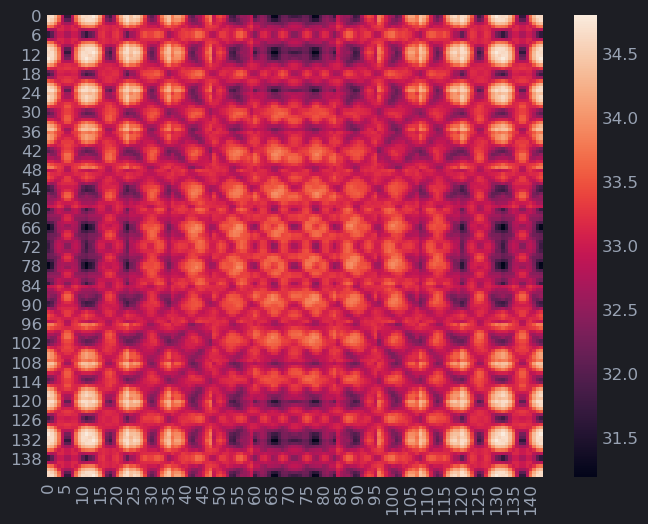

In [72]:
xy = jnp.mgrid[0:1:12j, 0:1:12j].reshape(2, -1).T

mat = GroupKernel().gram(xy).to_dense()
sns.heatmap(mat)

In [73]:
jnp.linalg.cholesky(mat + jnp.eye(mat.shape[0]) * 1e-3)

Array([[nan,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan,  0.,  0.],
       [nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float64)

In [10]:
GroupKernel().gram?

Object `gram` not found.
